# Community Housing Survey Project
This notebook is designed to do exploratory data analysis for the 2020 PhD-Community Initiative Housing
Survey dataset

Coded by Josh Moskowitz in February 2020

---




Import the relevant libraries and other setup

In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup
%matplotlib inline
pd.set_option('display.max_columns', None)

Import survey data

In [487]:
survey = pd.read_excel('F:/Users/Josh/Dropbox/PhD-CI/KCH_01312020.xlsx',index_col=None,header=0)
questions = survey.iloc[0][:] # grab question wording and store for later

## Cleanup survey data

Remove unecessary rows and cols

In [488]:
survey.drop(index=[0,1],inplace=True) # remove first 2 rows
# Remove any irrelevant or personally idenitifying columns
survey.drop(labels=['Status','IPAddress','RecipientLastName','RecipientFirstName','RecipientEmail',
                    'ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel',
                    'UserLanguage','info','consent'],axis=1,inplace=True)
survey.reset_index(drop=True, inplace=True) # reset index

Remove Whitespace and weird characters

In [489]:
def cleanDataFrame(obj):
    "Return a modified string"
    if isinstance(obj, str): # if object is a string
        return obj.replace("â€™", "'").strip() # fix apostrophes and remove trailing whitespace
    else:
        return obj

survey = survey.applymap(cleanDataFrame)

Function that will strip commas and split string when a person gave multiple responses

In [ ]:
def cleanAndSplit(string):
    "Split the string split into seperate responses"
    
    # remove commas from one of the possible survey responses
    # "I need to be closer to work, childcare, or social/health support services"
    if "I need to be closer to work" in string:
        idx1 = string.find("childcare") - 2
        idx2 = string.find(" or ") - 1
        cleanString = string[:idx1] + string[idx1:idx2].replace(',','') + string[idx2+1:]
    else:
        cleanString = string

    return cleanString.split(',')

In [490]:
list(survey.columns) # check col names for plotting

['StartDate',
 'EndDate',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'num_applied',
 'num_applied_explain',
 'num_applied_explain_2_TEXT',
 'num_applied_explain_3_TEXT',
 'private_housing',
 'current_living_arr',
 'current_living_arr_6_TEXT',
 'why_move',
 'why_move_7_TEXT',
 'subsidy',
 'employment',
 'income_stable',
 'utilities',
 'debt',
 'mental_health',
 'substance_use',
 'gender',
 'age',
 'fam_status',
 'fam_status_5_TEXT',
 'first_nation',
 'vis_minority',
 'can_residency',
 'can_residency_3_TEXT']

## Basic demographic data

### Gender

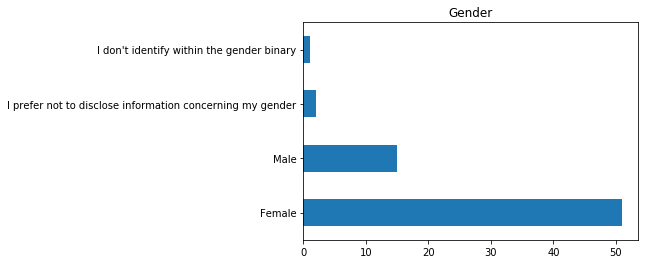

In [491]:
survey.gender.value_counts().plot(kind='barh',title="Gender")

### Age

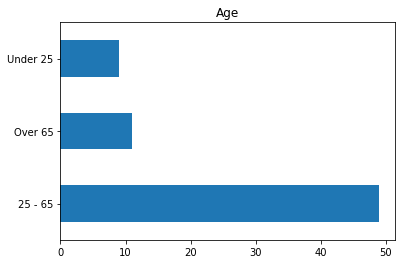

In [492]:
survey.age.value_counts().plot(kind='barh',title='Age')

### Family Status

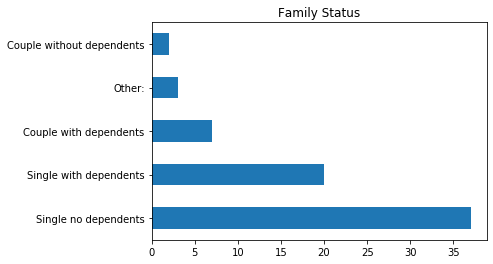

In [493]:
survey.fam_status.value_counts().plot(kind='barh',title='Family Status')

### Do you identify as First Nation (Status/Non-Status), Métis, or Inuk (Inuit)?

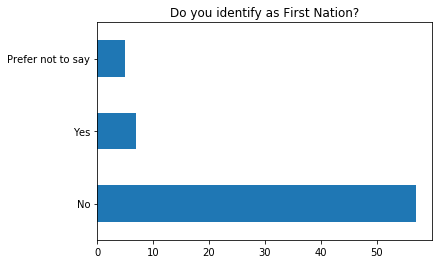

In [528]:
survey.first_nation.value_counts().plot(kind='barh',title='Do you identify as First Nation?')

### Do you identify as a visible minority?

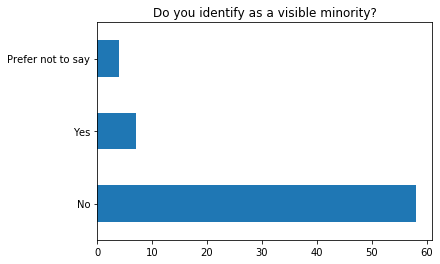

In [529]:
survey.vis_minority.value_counts().plot(kind='barh',title='Do you identify as a visible minority?')

### Residency Status

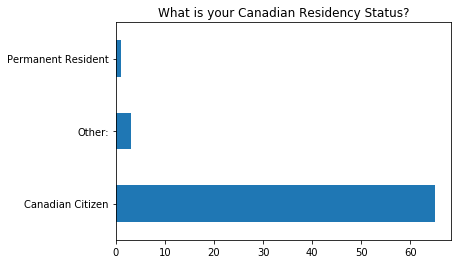

In [530]:
survey.can_residency.value_counts().plot(kind='barh',title='What is your Canadian Residency Status?')

### Employment Status

In [511]:
SepResp = []
for i in survey.employment:
    if isinstance(i,str):
        SepResp.append(cleanAndSplit(i)) # Append responses to List
        
SepResp = [item for sublist in SepResp for item in sublist] # flatten list
employ = pd.Series(SepResp,index=None) # convert to series

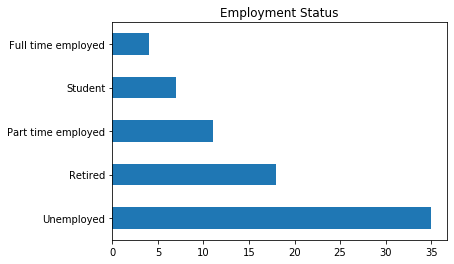

In [512]:
employ.value_counts().plot(kind='barh',title='Employment Status')

### Current Living Status

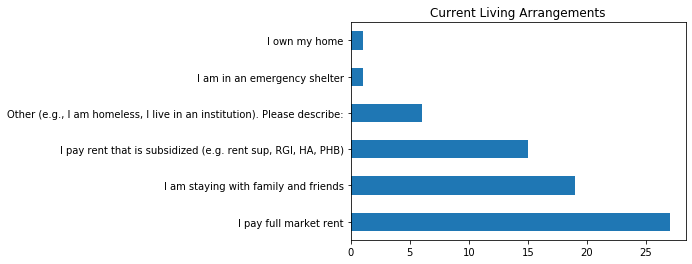

In [494]:
survey.current_living_arr.value_counts().plot(kind='barh',title='Current Living Arrangements')

### Reasons for moving

In [496]:
SepResp = []
for i in survey.why_move:
    if isinstance(i,str):
        SepResp.append(cleanAndSplit(i)) # Append responses to List
        
SepResp = [item for sublist in SepResp for item in sublist] # flatten list
MovReasons = pd.Series(SepResp,index=None) # convert to series

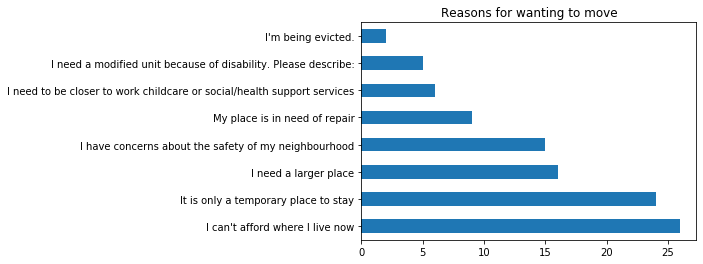

In [497]:
MovReasons.value_counts().plot(kind='barh',title='Reasons for wanting to move')

## Waitlist Status

### Number of Times Applied for Waitlist status

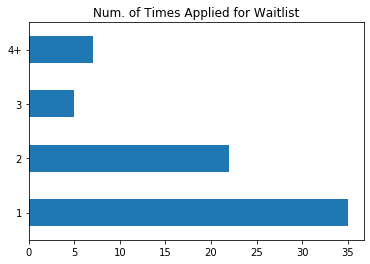

In [498]:
survey.num_applied.value_counts(sort=False).plot(kind='barh',title='Num. of Times Applied for Waitlist')

### Reason for applying multiple times

In [499]:
SepResp = []
for i in survey.num_applied_explain:
    if isinstance(i,str):
        SepResp.append(cleanAndSplit(i))
        
SepResp = [item for sublist in SepResp for item in sublist] # flatten list
ApplyReasons = pd.Series(SepResp,index=None) # convert to series

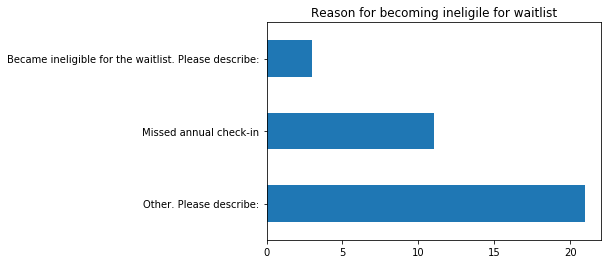

In [500]:
ApplyReasons.value_counts().plot(kind='barh',xticks=np.arange(0, 25, step=5),title='Reason for becoming' 
    ' ineligile for waitlist')

### Applied to affordable housing options?

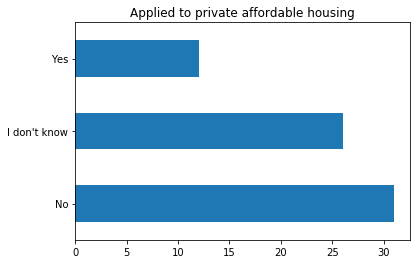

In [501]:
survey.private_housing.value_counts().plot(kind='barh',title='Applied to private affordable housing')

### Prefer to stay with rent subsidy

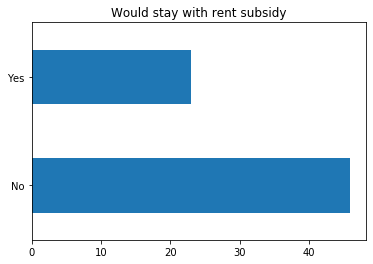

In [502]:
survey.subsidy.value_counts(sort=False).plot(kind='barh',title='Would stay with rent subsidy')

### Why do people want/not want the rent subsidy?

In [503]:
data = survey.groupby(['subsidy']).current_living_arr.value_counts().to_frame()

In [504]:
data.rename(columns={'current_living_arr':'resp'},inplace=True)

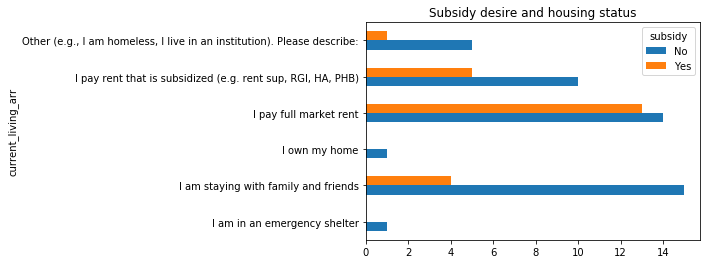

In [505]:
pd.pivot_table(data, index = 'current_living_arr', columns = 'subsidy', values 
= 'resp').plot(kind = 'barh',title='Subsidy desire and housing status')

In [506]:
subYes = survey.loc[(survey['subsidy']=='Yes')].why_move
subNo = survey.loc[(survey['subsidy']=='No') &
                  (survey['current_living_arr']=='I pay full market rent')].why_move

In [507]:
SepResp = []
for i in subYes:
    if isinstance(i,str):
        SepResp.append(cleanAndSplit(i)) # Append responses to List
        
SepResp = [item for sublist in SepResp for item in sublist] # flatten list
subYesMoveReasons = pd.Series(SepResp,index=None).to_frame().rename(columns={0:'resp'}) # convert to Dataframe

In [508]:
SepResp = []
for i in subNo:
    if isinstance(i,str):
        SepResp.append(cleanAndSplit(i)) # Append responses to List
        
SepResp = [item for sublist in SepResp for item in sublist] # flatten list
subNoMoveReasons = pd.Series(SepResp,index=None).to_frame().rename(columns={0:'resp'}) # convert to Dataframe

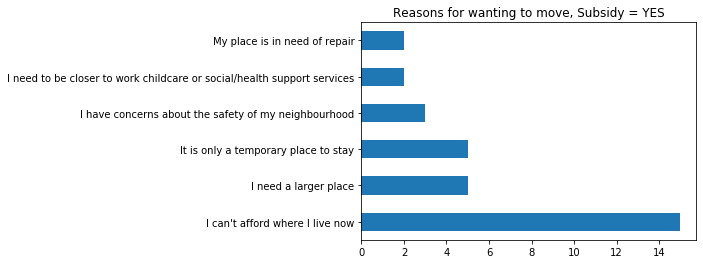

In [509]:
subYesMoveReasons.resp.value_counts().plot(kind='barh',title='Reasons for wanting to move, Subsidy = YES')

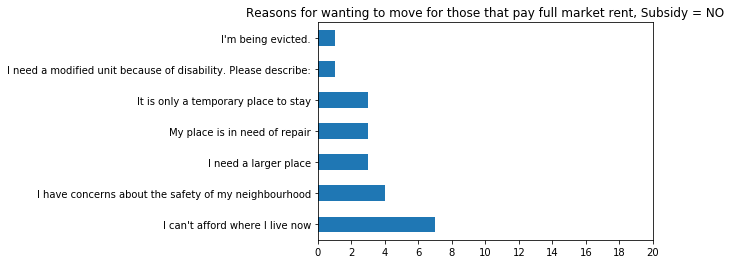

In [513]:
subNoMoveReasons.resp.value_counts().plot(kind='barh',title='Reasons for wanting to move for those'
                                          ' that pay full market rent, Subsidy = NO',
                                          xticks=np.arange(0, 22, step=2))

### How stable is your income?

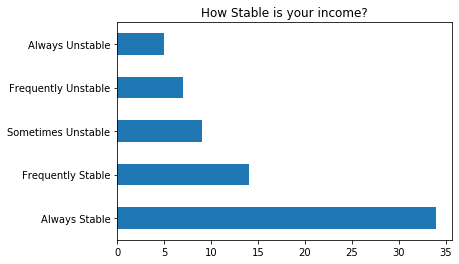

In [517]:
survey.income_stable.value_counts().plot(kind='barh',title='How Stable is your income?')

### Do you struggle to pay your utilities bill?

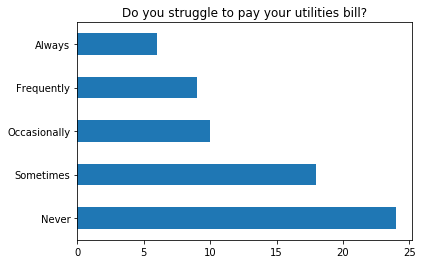

In [518]:
survey.utilities.value_counts().plot(kind='barh',title='Do you struggle to pay your utilities bill?')

### Is debt a reason why you are seeking a new residence?

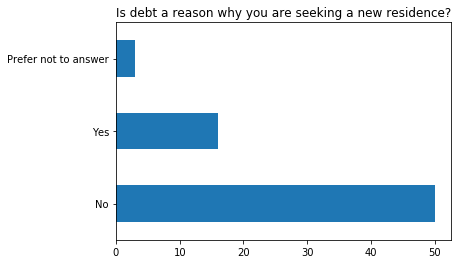

In [521]:
survey.debt.value_counts().plot(kind='barh',title='Is debt a reason why you are seeking a new residence?')

### How much do you struggle with mental health issues?

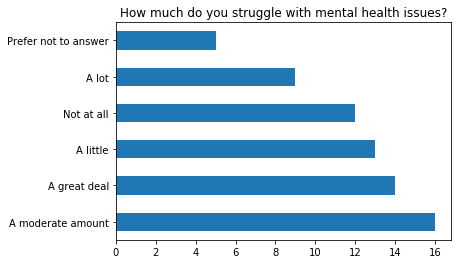

In [525]:
survey.mental_health.value_counts().plot(kind='barh',title='How much do you struggle with mental health issues?')

### How much do you struggle with issues related to drinking or drug use?

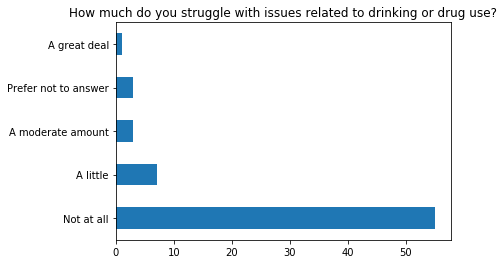

In [526]:
survey.substance_use.value_counts().plot(kind='barh',title='How much do you struggle with issues related to drinking or drug use?')